## DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CO2.csv')

del df['Model Year']
del df['Make']
del df['Model']
del df['Vehicle Class']
del df['Smog Rating']
del df['Transmission']

df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating
0,2.4,4,Z,9.9,7.0,8.6,33,200,6
1,3.5,6,Z,12.6,9.4,11.2,25,263,4
2,2.0,4,Z,11.0,8.6,9.9,29,232,5
3,2.0,4,Z,11.3,9.1,10.3,27,242,5
4,2.0,4,Z,11.2,8.0,9.8,29,230,5


In [3]:
df = df.rename({'Engine Size(L)': 'Engine_Size','Fuel Type':'Fuel_Type','Fuel Consumption (City (L/100 km)':'Fuel_Consumption_City',
                'Fuel Consumption(Hwy (L/100 km))':'Fuel_Consumption_Higway','Fuel Consumption(Comb (mpg))':'Fuel_Consumption_miles',
                'CO2 Emissions(g/km)':'CO2_Emission_KM','CO2 Rating':'CO2_Rating','Fuel Consumption(Comb (L/100 km))':'Fuel_Consumption_km'}, axis=1) 

In [4]:
df.head()

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Higway,Fuel_Consumption_km,Fuel_Consumption_miles,CO2_Emission_KM,CO2_Rating
0,2.4,4,Z,9.9,7.0,8.6,33,200,6
1,3.5,6,Z,12.6,9.4,11.2,25,263,4
2,2.0,4,Z,11.0,8.6,9.9,29,232,5
3,2.0,4,Z,11.3,9.1,10.3,27,242,5
4,2.0,4,Z,11.2,8.0,9.8,29,230,5


In [5]:
df.columns

Index(['Engine_Size', 'Cylinders', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Higway', 'Fuel_Consumption_km',
       'Fuel_Consumption_miles', 'CO2_Emission_KM', 'CO2_Rating'],
      dtype='object')

<Axes: xlabel='CO2_Rating', ylabel='count'>

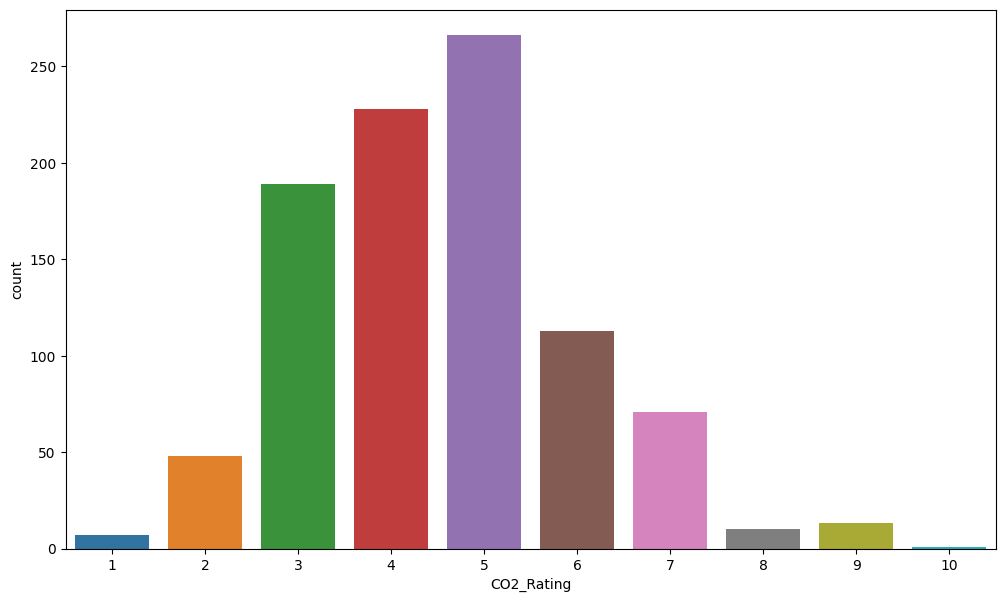

In [6]:
plt.figure(figsize=(12,7))
sns.countplot(x='CO2_Rating',data=df)

(array([425.,   1., 295., 197.,   0.,   8.,  17.,   0.,   0.,   3.]),
 array([ 3. ,  4.3,  5.6,  6.9,  8.2,  9.5, 10.8, 12.1, 13.4, 14.7, 16. ]),
 <BarContainer object of 10 artists>)

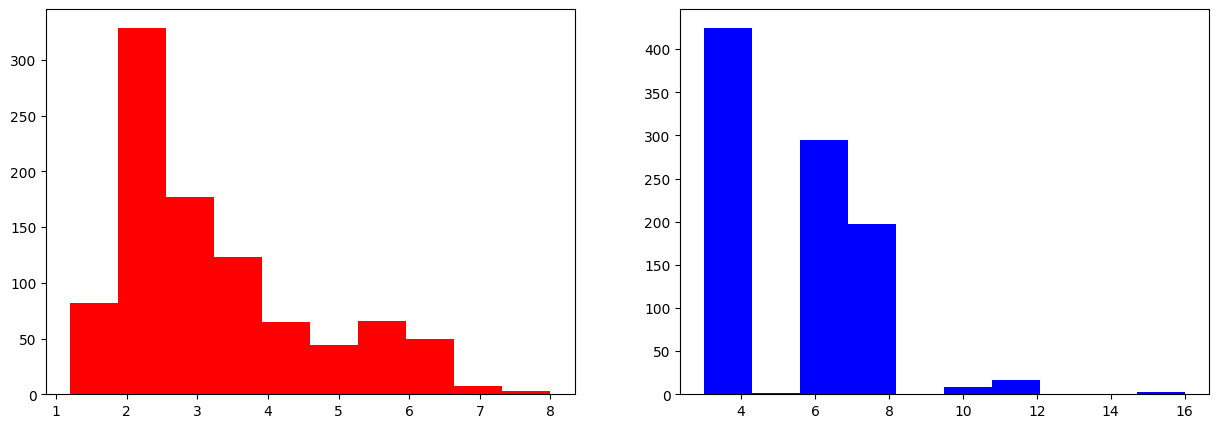

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df['Engine_Size'],color='red')

plt.subplot(1,2,2)
plt.hist(df['Cylinders'],color='blue')


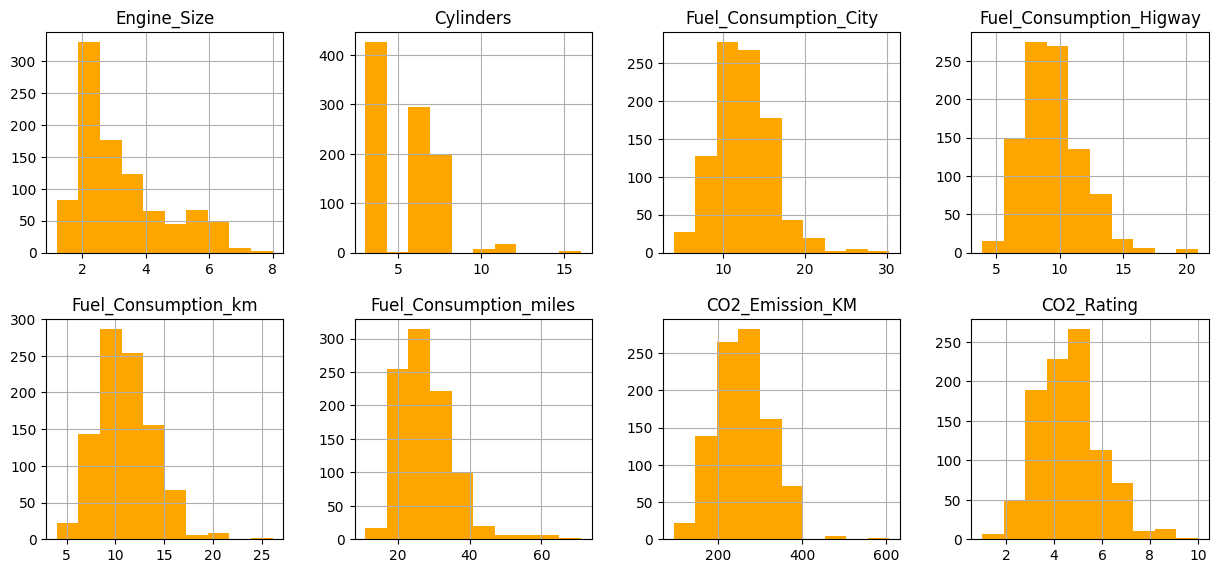

In [8]:
df.hist(figsize=(15,55),layout=(15,4), color='orange')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9dc771cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9dc772e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9dc49dc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9dc773e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9da407110>],
 'means': []}

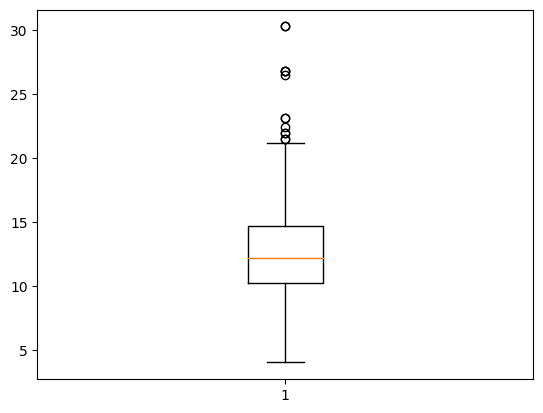

In [9]:
plt.boxplot(df["Fuel_Consumption_City"])

<BarContainer object of 946 artists>

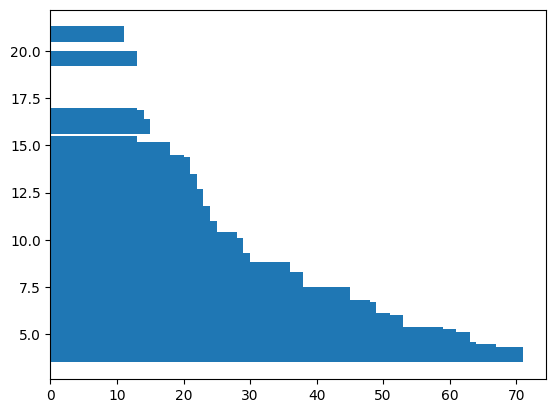

In [11]:
plt.barh(df['Fuel_Consumption_Higway'],df["Fuel_Consumption_miles"]) # scatter, plot, triplot, stackplot

<Axes: >

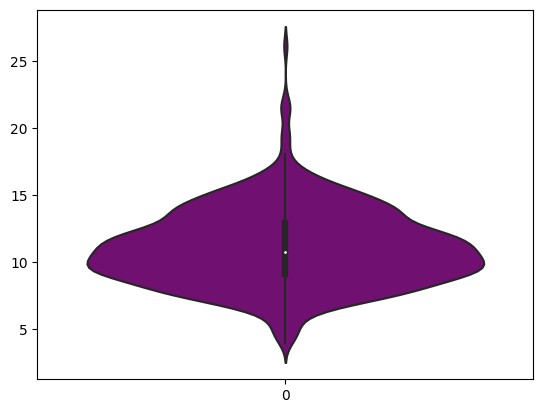

In [12]:
sns.violinplot(df['Fuel_Consumption_km'], color='purple') 

<Axes: ylabel='Density'>

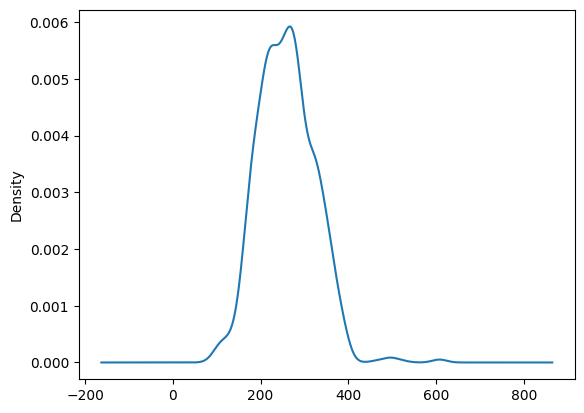

In [13]:
df['CO2_Emission_KM'].plot(kind='density')

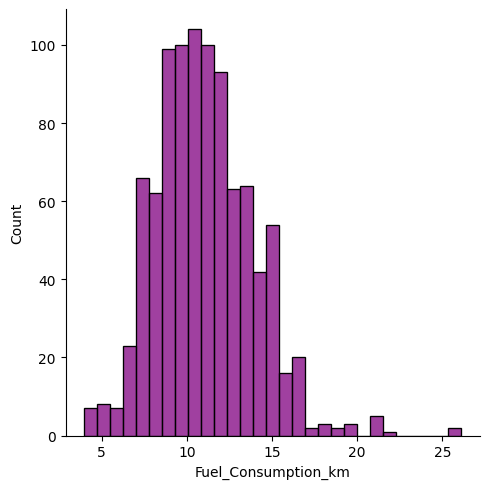

In [14]:
sns.displot(df['Fuel_Consumption_km'], color='purple') 
# barplot, boxenplot, boxplot, countplot, displot, distplot, ecdfplot, histplot, kdeplot, pointplot, violinplot, stripplot

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Fuel_Type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

<Axes: >

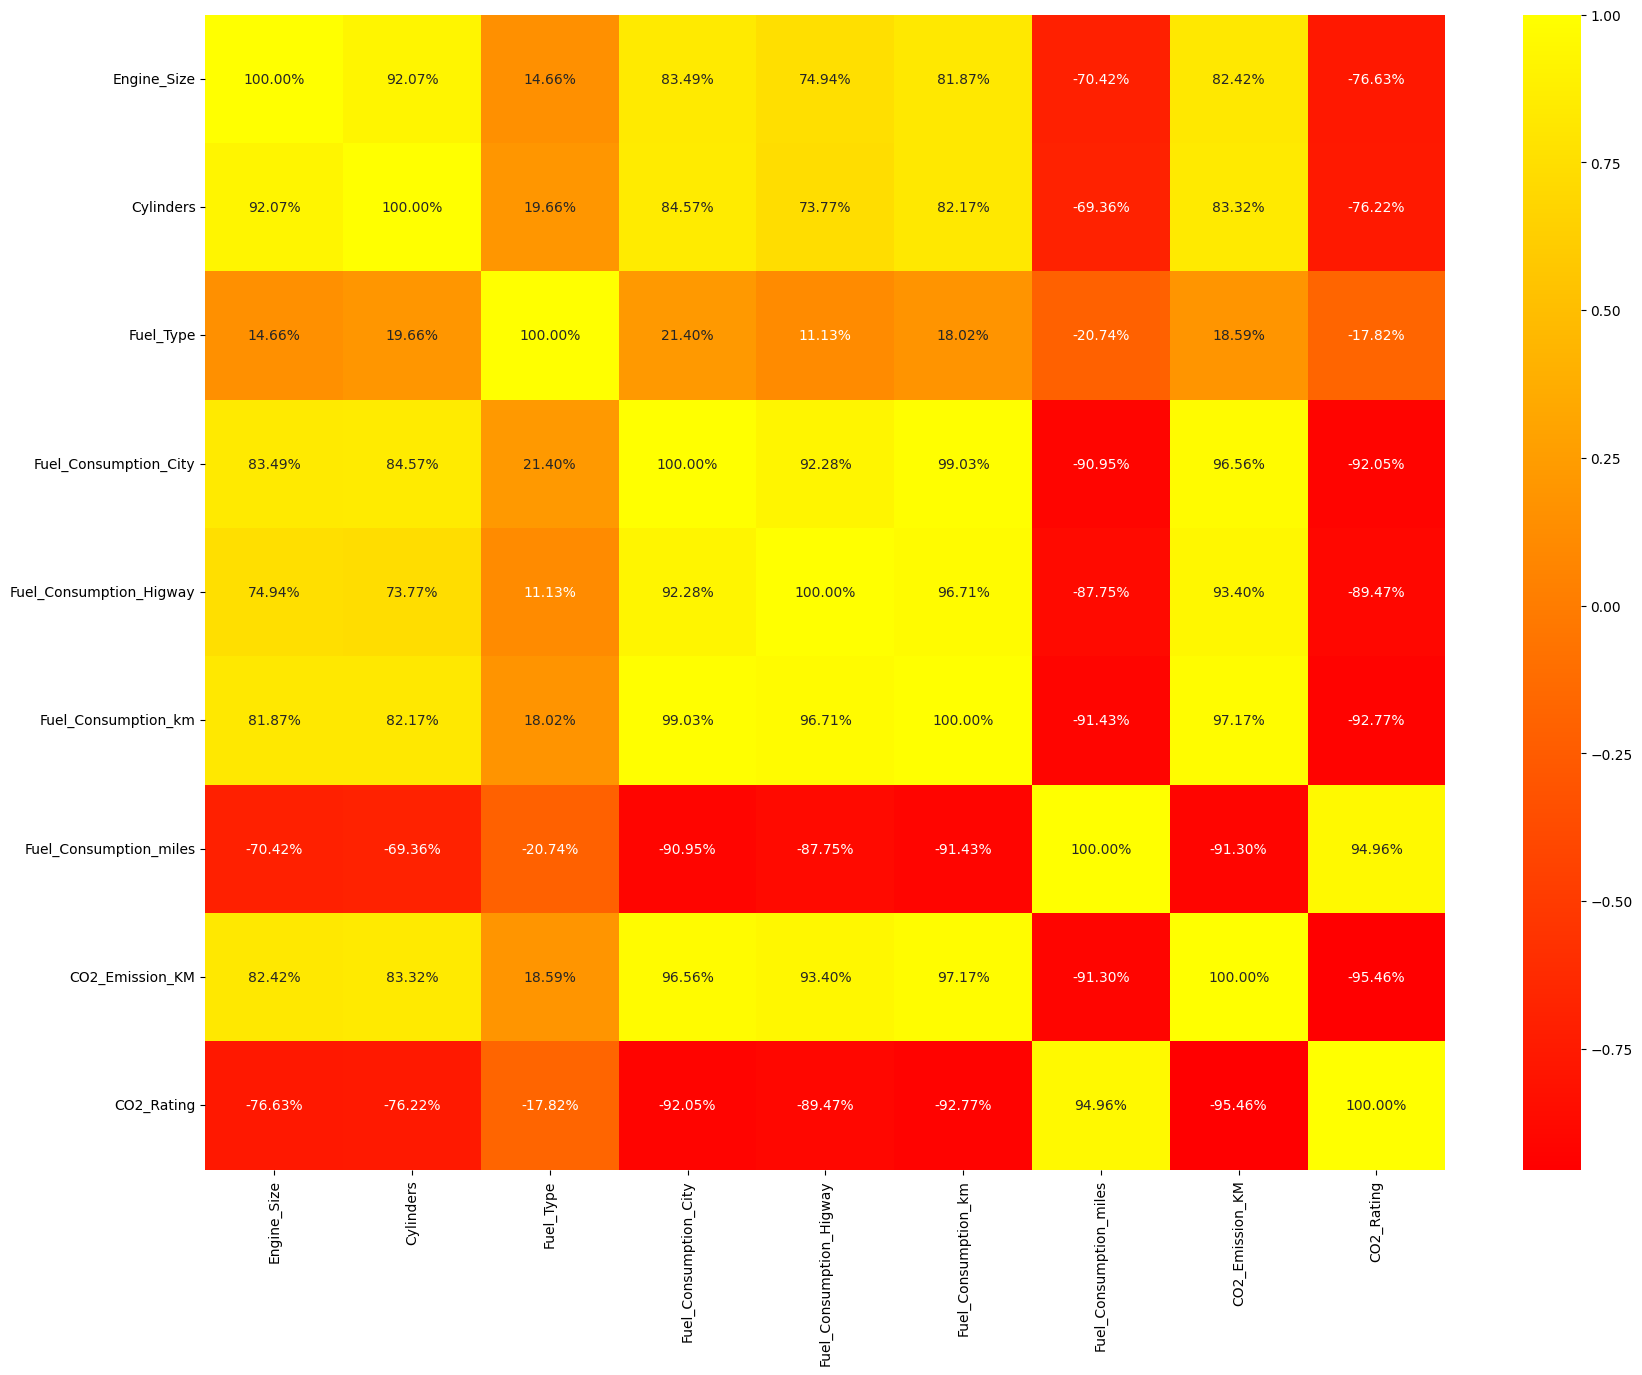

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, fmt='0.2%',cmap = 'autumn',ax=ax)

CO2_Rating
5     28.12
4     24.10
3     19.98
6     11.95
7      7.51
2      5.07
9      1.37
8      1.06
1      0.74
10     0.11
Name: count, dtype: float64

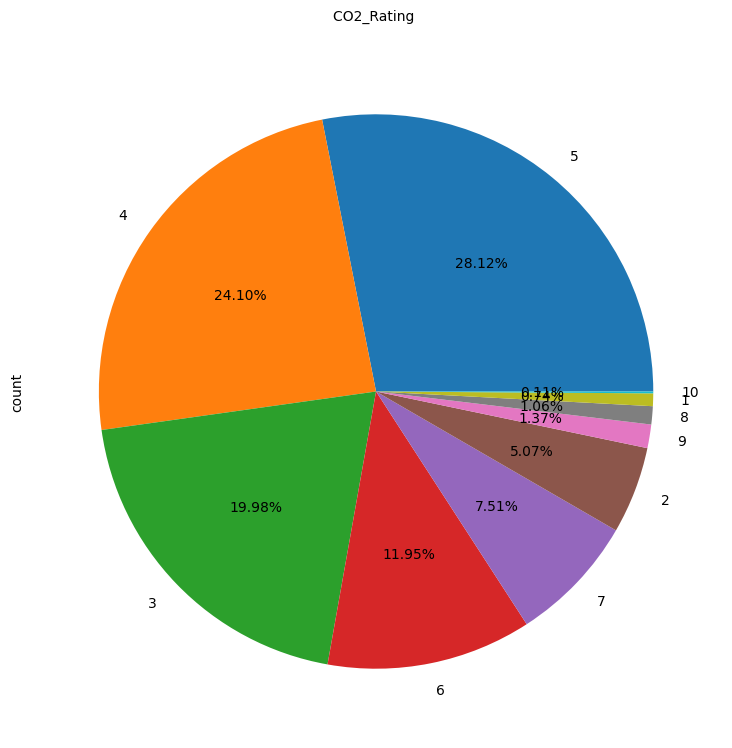

In [20]:
def plot(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return np.round(dataframe_pie/df.shape[0]*100,2)

plot(df, 'CO2_Rating')